In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


class
notumor       120
meningioma    120
pituitary     120
glioma        120
Name: count, dtype: int64


<ipython-input-9-c4ea34d7c409>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


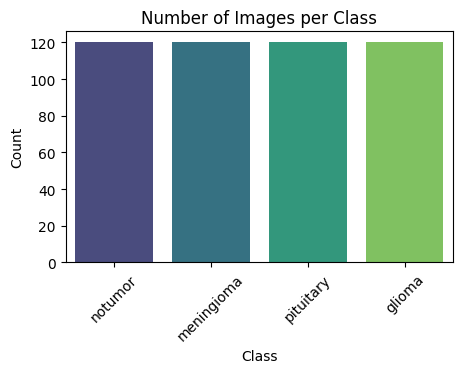

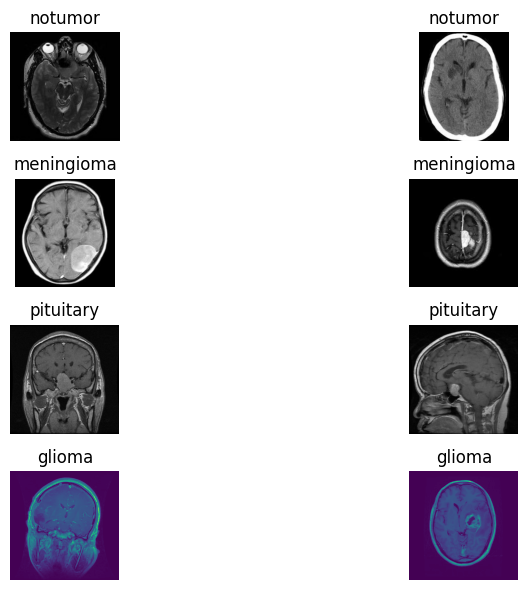

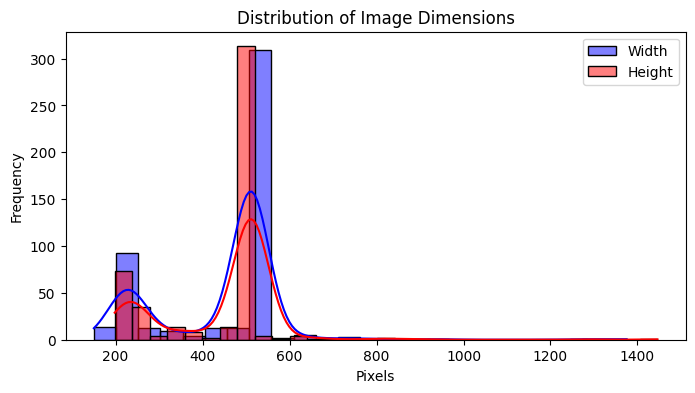

             width       height
count   480.000000   480.000000
mean    441.900000   446.431250
std     141.789644   138.146527
min     150.000000   198.000000
25%     309.750000   350.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1375.000000  1446.000000


In [9]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

# Set the root directory of the dataset
root_dir = '/content/drive/MyDrive/Machine Learning Project/dataset_13'

# Get class names (sub-folder names)
classes = [d.name for d in os.scandir(root_dir) if d.is_dir()]

# Initialize a list to store image paths and their respective classes
image_paths = []
image_classes = []

# Loop through each class folder
for class_name in classes:
    class_dir = os.path.join(root_dir, class_name)
    for img_name in os.listdir(class_dir):
        if img_name.endswith(('jpg', 'jpeg', 'png', 'bmp')):
            image_paths.append(os.path.join(class_dir, img_name))
            image_classes.append(class_name)

# Create a DataFrame to hold image paths and their classes
df = pd.DataFrame({
    'image_path': image_paths,
    'class': image_classes
})

# Display the number of images per class
class_counts = df['class'].value_counts()
print(class_counts)

# Plot the distribution of images per class
plt.figure(figsize=(5, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display 10 sample images (2 from each class)
def display_sample_images(df, classes, samples_per_class=2):
    total_samples = len(classes) * samples_per_class
    plt.figure(figsize=(11, 6))
    for i, class_name in enumerate(classes):
        sample_images = df[df['class'] == class_name]['image_path'].sample(samples_per_class).values
        for j, img_path in enumerate(sample_images):
            img = Image.open(img_path)
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(df, classes, samples_per_class=2)

# Analyze image dimensions
image_dimensions = []

for img_path in df['image_path']:
    with Image.open(img_path) as img:
        image_dimensions.append(img.size)

# Create a DataFrame for image dimensions
dim_df = pd.DataFrame(image_dimensions, columns=['width', 'height'])

# Plot the distribution of image dimensions
plt.figure(figsize=(8, 4))
sns.histplot(dim_df['width'], kde=True, color='blue', label='Width')
sns.histplot(dim_df['height'], kde=True, color='red', label='Height')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display basic statistics about image dimensions
print(dim_df.describe())
